- initialisation: to set the number of input, hidden and output nodes

- train: refine the weights after being given a trainingset example to learn from 

- query: give an answer from the output nodes after being given an input

In [161]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [202]:
# neural network class definition
class neuralNetwork():
    # initialisa the neural network
    def __init__(self, input_nodes_num, hidden_nodes_num, output_nodes_num, learning_rate):
        # set number of nodes in each input, hidden, ouput layer
        self.inodes = input_nodes_num
        self.hnodes = hidden_nodes_num
        self.onodes = output_nodes_num

        # learning rate
        self.lr = learning_rate
        
        # Weights: The Heart of the Network
        self.w_ih = (np.random.rand(self.hnodes, self.inodes) - 0.5)
        self.w_ho = (np.random.rand(self.onodes, self.hnodes) - 0.5)
        
        # 1/√(number of incoming links).
        self.w_ih = np.random.normal(0.0, pow(self.hnodes, -0.5),
                                    (self.hnodes, self.inodes))
        self.w_ho = np.random.normal(0.0, pow(self.onodes, -0.5),
                                    (self.onodes, self.hnodes))
        # activate funcation is the sigmoid funcation
        self.activate_funcation = lambda x:scipy.special.expit(x)
        
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.w_ih, inputs)
        hidden_outputs = self.activate_funcation(hidden_inputs)
        
        final_inputs = np.dot(self.w_ho, hidden_outputs)
        final_outputs = self.activate_funcation(final_inputs)
        
        ###### Back propagated errors ########
        output_error = targets - final_outputs
        # Calculate the back propagated errors for the hidden layer nodes
        # error_hidden = weights^T_hidden_output * error_output
        hidden_error = np.dot(self.w_ho.T, output_error)

        ###### Update the weights ########
        # update the weights for the links between the hidden and output
        self.w_ho += self.lr * np.dot((output_error * final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        # update the weights for the links between the hidden and input
        self.w_ih += self.lr * np.dot((hidden_error * hidden_outputs*(1.0-hidden_outputs)), np.transpose(inputs))
        
    def query(self, inputs_list):
        # X_hidden = W_input_hidden ∙ I
        hidden_inputs = np.dot(self.w_ih, inputs_list)
        # O_hidden = sigmoid(X_hidden)
        hidden_outputs = self.activate_funcation(hidden_inputs)
        
        final_inputs = np.dot(self.w_ho, hidden_inputs)
        final_outputs = self.activate_funcation(final_inputs)
        return final_outputs

In [212]:
# 28*28
input_nodes_num = 784
hidden_nodes_num = 100
# 10个目标数字
output_nodes_num = 10

learning_rate = 0.1

n = neuralNetwork(input_nodes_num, hidden_nodes_num, output_nodes_num, learning_rate)

In [213]:
# n.query([1,0.5,-1.5])

## 训练网络

1. 根据指定的训练样本计算输出
2. 将计算得到的输出与所需输出对比，使用差值来指导网络权重的更新

- MNIST
    - 28x28=784
    - 标记和像素值

In [214]:
# dataset: https://pjreddie.com/projects/mnist-in-csv/
training_data_file = open("/Users/yogayu/Documents/code/makeyourownneuralnetwork/mnist_dataset/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [215]:
len(data_list)

100

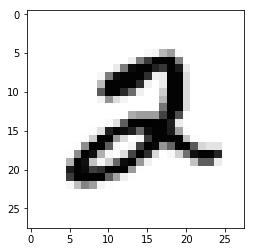

In [216]:
all_values = data_list[5].split(',')
# asfarray: 将文本字符串转化为实数，并创建这些数字的数组
# reshape: 转化为28*28 的方形矩阵
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation='None')

In [217]:
# train the neural network
epochs = 5

for e in range(epochs):
    # 遍历每一个训练集数据
    for record in training_data_list:
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values, (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(output_nodes_num) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

In [218]:
# dataset: https://pjreddie.com/projects/mnist-in-csv/
# load the mnist test data CSV file into a list
test_data_file = open("/Users/yogayu/Documents/code/makeyourownneuralnetwork/mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [219]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# 遍历每一个测试集数据
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = np.argmax(outputs)
    
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

In [220]:
# calculate the performance score, the fraction of correct answers
scorecard_array = np.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.0998


epochs=1

0.1->0.1169
0.1->0.1318

epochs=5

0.1->0.098
0.3->0.098
0.6->0.098

epochs = 5
hnodes=200
lr=0.1
performance =  0.098

epochs = 1
0.1075


epochs = 5
hnodes = 100
lr = 0.1
0.0998

## 准备 MNIST 训练数据
- 将输入色彩值从0-255的范围，缩放至0.01-1.0的范围。不取0值，因为0会导致权值更新失败。

In [159]:
# scale input to range 0.01 to 1.00
# 0-255 转为 0-1，再乘0.99转为 0-0.99，在加0.01转为 0.01到1.0
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.04105882 0.46423529 0.99611765 0.86411765 0.35552941
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01  

In [160]:
#output nodes is 10
# 设置输出为10个节点
onodes = 10
# 创建默认值为0.01的节点
targets = np.zeros(onodes) + 0.01
# 将目标标签转为整数
# 将目标列表的正确元素设置为0.99
targets[int(all_values[0])] = 0.99

In [28]:
print(targets)

[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
